<a href="https://colab.research.google.com/github/SEDO11/knu_ai/blob/main/step6%EB%8B%A8%EC%88%9C%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#경사 하강법 넘파이
lr = 0.001

w=0.9853. b=0.0619, loss=  0.0029


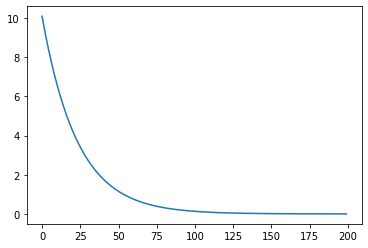

In [5]:
import numpy as np

def MSE(y, t):
  return np.sum((y-t)**2)/t.size

x = np.arange(12) #[0, 1, 2, 3, 4, 5, 6, 7, 8 ,9, 10, 11]
t = np.arange(12)

w = 0.5 #초기값
b = 0
lr = 0.001 #0.01, learning rate

loss_list = []
for epoch in range(200):
  y = w * x + b #calculate the output
  dW = np.sum(((y-t)*x) / (2 * x.size)) #gradients
  dB = np.sum(((y-t)) / (2 * x.size))

  w = w - lr * dW #update parameters
  b = b - lr * dB

  y = w * x + b # calculate the output
  loss = MSE(y, t)
  loss_list.append(loss)

print("w={:>.4f}. b={:>.4f}, loss={:>8.4f}".format(w, b, loss))

import matplotlib.pyplot as plt
plt.plot(loss_list)
plt.show()

lr = 0.01

w=0.9936. b=0.0489, loss=  0.0007


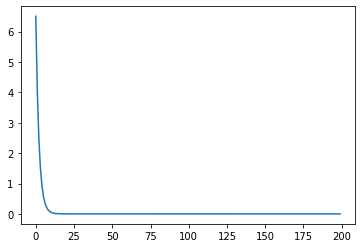

In [6]:
import numpy as np

def MSE(y, t):
  return np.sum((y-t)**2)/t.size

x = np.arange(12) #[0, 1, 2, 3, 4, 5, 6, 7, 8 ,9, 10, 11]
t = np.arange(12)

w = 0.5 #초기값
b = 0
lr = 0.01 #0.001, learning rate

loss_list = []
for epoch in range(200):
  y = w * x + b #calculate the output
  dW = np.sum(((y-t)*x) / (2 * x.size)) #gradients
  dB = np.sum(((y-t)) / (2 * x.size))

  w = w - lr * dW #update parameters
  b = b - lr * dB

  y = w * x + b # calculate the output
  loss = MSE(y, t)
  loss_list.append(loss)

print("w={:>.4f}. b={:>.4f}, loss={:>8.4f}".format(w, b, loss))

import matplotlib.pyplot as plt
plt.plot(loss_list)
plt.show()

6-2 미니배치에 의한 확률적 경사강하법

epoch=0: w=  0.5405. b=  0.0048
epoch=10: w=  0.7509. b=  0.0332
epoch=20: w=  0.8780. b=  0.0486
epoch=30: w=  0.9299. b=  0.0551
epoch=40: w=  0.9597. b=  0.0588
epoch=50: w=  0.9747. b=  0.0606
epoch=60: w=  0.9823. b=  0.0614
epoch=70: w=  0.9875. b=  0.0618
epoch=80: w=  0.9892. b=  0.0617
epoch=90: w=  0.9909. b=  0.0617
w=  0.9911. b=  0.0614, loss=0.000963174042400795


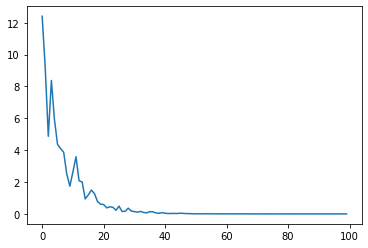

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def MSE(y, t):
  return np.sum((y-t)**2)/t.size

x = np.arange(12) #[0, 1, 2, 3, 4, 5, 6, 7, 8 ,9, 10, 11]
t = np.arange(12)

w = 0.5 #초기값
b = 0
lr = 0.001 #0.01, learning rate
loss_list = []

train_size = t.size #12
batch_size = 4
K = train_size // batch_size #3

for epoch in range(100):
  loss = 0
  for step in range(K):
    mask = np.random.choice(train_size, batch_size)
    x_batch = x[mask]
    t_batch = t[mask]

    y = w * x_batch + b #calculate the output
    dW = np.sum(((y-t_batch)*x_batch) / (2 * batch_size)) #gradients
    dB = np.sum(((y-t_batch)) / (2 * batch_size))

    w = w - lr * dW #update parameters
    b = b - lr * dB

    y = w * x_batch + b # calculate the output
    loss += MSE(y, t_batch)
  loss /= K
  loss_list.append(loss)
  if not epoch % 10: #10번마다 출력
    print("epoch={}: w={:>8.4f}. b={:>8.4f}".format(epoch, w, b, loss))

print("w={:>8.4f}. b={:>8.4f}, loss={}".format(w, b, loss))

plt.plot(loss_list)
plt.show()